# Data Visualization II
1. Use the inbuilt dataset 'titanic' as used in the above problem. Plot a box plot for
distribution of age with respect to each gender along with the information about whether
they survived or not. (Column names : 'sex' and 'age')
2. Write observations on the inference from the above statistics.

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import numpy as np   
import pandas as pd    
from tabulate import tabulate
import matplotlib.pyplot as plt 
from IPython.display import display
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())

In [8]:
titanic['deck'] = titanic['deck'].ffill()
titanic['deck'][0] = 'C'

In [9]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [10]:
titanic = titanic.drop('embark_town', axis=1)

In [11]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [12]:
titanic['embarked'] = titanic['embarked'].fillna('S')

# Boxplot

Boxplot is a convenient way to visualize the distribution of data through their quartiles. Box plots usually have vertical lines extending from the boxes which are termed as whiskers. These whiskers indicate variability outside the upper and lower quartiles, hence Box Plots are also termed as box-and-whisker plot and box-and-whisker diagram. Any Outliers in the data are plotted as individual points.

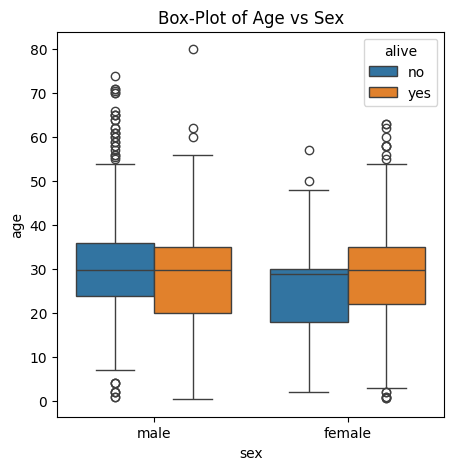

In [15]:
plt.figure(figsize=(5,5))
plt.title("Box-Plot of Age vs Sex")
sns.boxplot(x="sex", y="age",hue='alive', data=titanic)
plt.show()

# Heatmap

Visualizing data with heatmaps is a great way to do exploratory data analysis, when you have a data set with multiple variables. Heatmaps can reveal general pattern in the dataset, instantly. And it is very easy to make beautiful heatmaps with Seaborn library in Python.

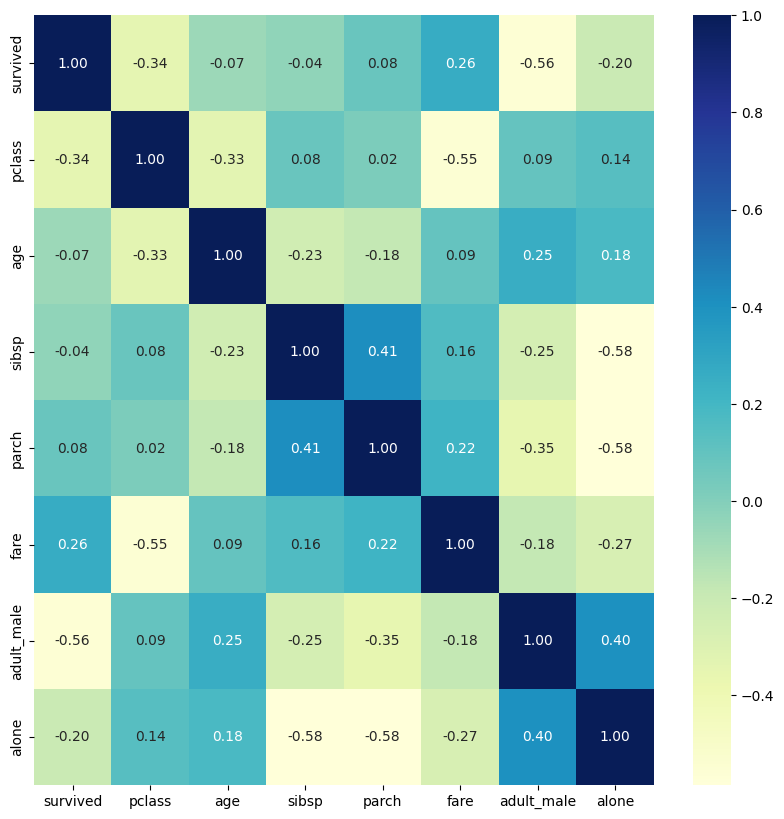

In [16]:
plt.subplots(figsize=(10, 10))
sns.heatmap(titanic.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()